# Blynk学习案例：在岗检测仪

制作：邱奕盛

详细案例介绍可以查看github资料，/vvBoard-docs/课程汇集/虚谷号内置课程目录/2.物联网应用/Blynk学习案例：在岗检测仪（.ipynb/.pdf）。

老师们有意见和建议可以发送邮件到easonqys@foxmail.com，也可以在论坛共同交流。

## 目录
1 教学目标

2 问题引入

3 准备工作

4 程序编写

5 扩展提升

6 参考资料

## 教学目标
使零基础学生，利用虚谷号Blynk掌握用手机控制家电的能力。

#### 核心素养：
信息意识、计算思维、数字化学习与创新、信息社会责任

#### 具体目标：
认识物联网；
了解物联网控制电器的基本思路；
体验用物联网思维发现和解决生活中的问题的过程。

#### 评价标准：
说出物联网的作用；
能够利用模板基本实现电器控制；
发现和解决生活中的物联网问题。

建议过程评价与作业评价相结合，老师评价和学生评价相结合。

## 问题引入
在学校常常想去老师办公室答疑，可是不知道老师在不在办公室，总是跑道办公室门口才知道。虽然办公室门口有老师的去向牌，但是往往更新不及时，我们能不能做一个物联网系统实时检测老师在岗状态呢？想一想，你可以怎么实现？又需要哪些工具？

假如我们可以通过老师办公室的座椅空闲状态来检测老师在岗状态，而且你可以在远程用手机查看的话，是不是很棒呢？

这种远程**感知**信息或者**控制**的技术叫做物联网技术。下面我们来学习一下如何实现吧！

这里我们使用Blynk，Blynk是一个物联网平台，旨在简化物联网的移动和Web应用程序的构建。虚谷号上虽然已经整合了SIoT，但是Blynk也可以同时部署。相对于其他MQTT的服务器来说，Blynk的优势在于连接快速，且提供了免费的移动平台上的配套应用，包括iOS和Android。可用于控制Arduino、树莓派、掌控板和虚谷号等。国内外案例也较丰富。
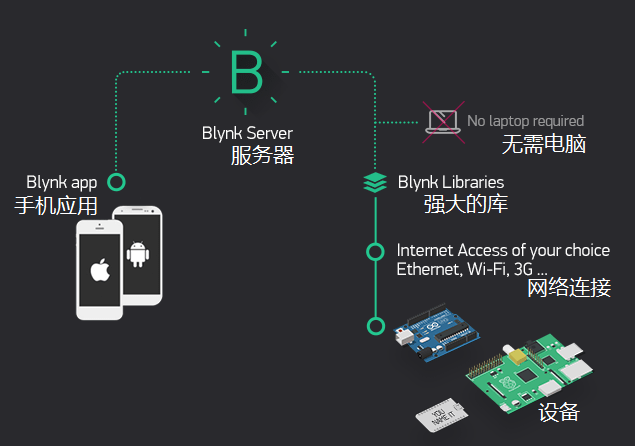

## 准备工作
你需要：手机x1；虚谷号及电源线x1；电脑x1；红外数字避障传感器x1；杜邦线若干。
### 系统安装
#### 虚谷号的远程桌面连接
访问虚谷号，最方便的是使用远程桌面连接。初次使用，需要执行以下两行：(jupyter代码前加！表示以LX命令行运行）

In [ ]:
!sudo apt install xrdp
!sudo apt installtightvncserver

接下来，你就可以远程连接到你的虚谷号了。

#### 虚谷号上的相关设置
1.由于端口8080冲突，你可以选择关闭SIoT或者修改SIoT端口。

方法一：关闭SIoT

用U盘模式打开，修改/vvBoard/vvBoard_config.ini中Siot=0，重启虚谷号。

方法二：修改SIoT端口（推荐）

远程桌面连接，打开/home/scope/software/SIoT_1_2_vvBoard/config.json修改"WebServerAdrr":"0.0.0.0:8088"。这样SIoT的服务端口可以改为8088。重启虚谷号生效。

2.安装Blynk服务器

Blynk提供了一个基于Netty的开源Java服务器，可以从您的计算机甚至树莓派(Raspberry Pi)、虚谷号(vvboard)、拿铁熊猫(LattePanda)之类的迷你电脑来运行该服务器。在功能和安全性方面，这为某些用户带来了各种好处。

提前下载https://github.com/blynkkk/blynk-server/releases/download/v0.41.12/server-0.41.12-java8.jar
并将下载的文件移动到/home/scope/目录下。（可以利用Jupyter上传）

打开LX终端,输入以下命令，在默认的“硬件端口8080”和默认的“应用程序端口9443”（SSL端口）上运行服务器，如果路径不同或者文件名不同请做相应修改。

In [ ]:
!java -jar /home/scope/server-0.41.12-java8.jar -dataFolder /home/scope/Blynk

看到Blynk Server successfully started,那就恭喜你成功了，第一次运行还会提示默认用户名和密码

用户名为admin@blynk.cc

密码为admin

如果想要每次虚谷号开机就自启动的话，可以修改/etc/rc.local文件，在exit 0上面一行输入

java -jar/home/scope/server-0.41.12-java8.jar -dataFolder /home/scope/Blynk start &

其实关键就在于在命令行后面加了start & ，意思是保持后台运行。如果今后有其他命令需要开机自启动，也可以添加到这里。

具体操作如下：远程桌面连接下打开文件，默认是用vim打开的，按i进入编辑模式，用方向键移动到exit 0 的上一行，输入上面的文字，按ESC退出编辑模式，输入“:wq”保存退出。

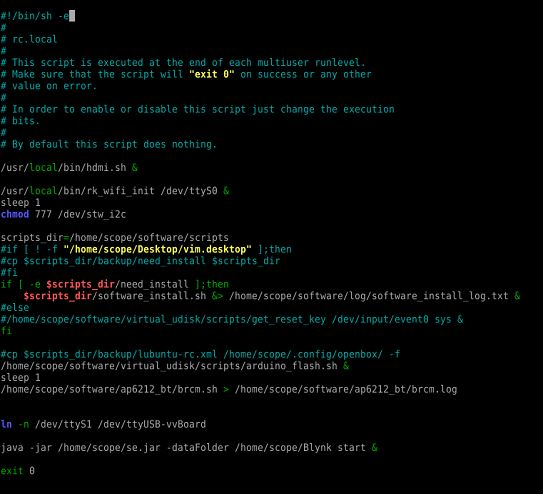

重启生效。

#### 在手机上安装Blynk
Blynk的App是具有易于使用的拖放系统，可为IoT设置构建自定义控件。工作流程非常快速：启动新项目时，系统会提示您从广泛的列表中选择开发板，以及连接方式。然后，该应用通过电子邮件发送授权令牌，以通过Blynk服务器连接到您的设备。应用中的提供了很多小部件。每个小部件都有一个编辑菜单，可让您更改名称和颜色。然后，您选择要影响的引脚（无论是板上的引脚还是Blynk的虚拟引脚之一）以及要发送的值范围。对于图形或文本框之类的输出显示，您还可以选择更新频率，从而节省宝贵的带宽。Blynk还具有将指令分配给“虚拟”引脚的功能，这是用户配置的应用程序与硬件之间的连接。因此，应用程序中的单个按钮可用于触发设备上的许多不同事件。

iOS用户可在应用商店安装，Android用户可以在网络上搜索安装包或通过下面链接下载安装包。

Android下载地址：https://m.baidu.com/ala/c/m.eoemarket.com/apps/show/id/830895
安装完成后无需注册。

#### 将手机连接到Blynk服务器
通过U盘模式查看虚谷号的IP地址，具体操作为打开/vvBoard/wifi_log.txt，查看inet地址。

手机上打开Blynk，点击Log In，点击下方链路图标，滑动开关至CUSTOM。输入刚刚查到的ip地址，后面的9443是端口号，无需修改。点击OK，输入账户名(admin@blynk.cc)和密码(admin)，点击Log In。
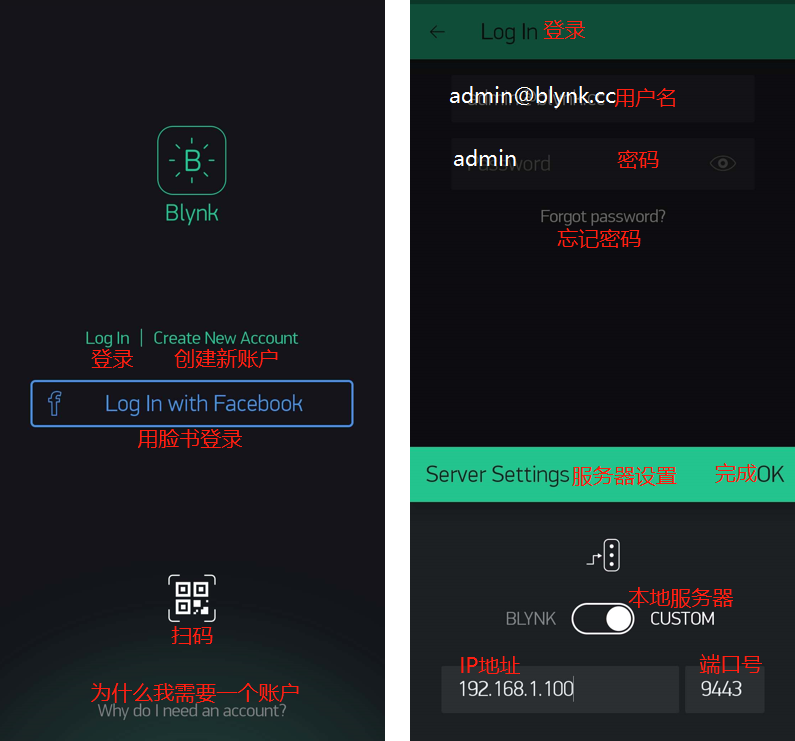
至此，准备工作完毕。

## 程序编写
首先，我们要新建一个项目。具体操作是：在手机App上登录后，点击New Project，输入项目名称后点击Create，就完成了。
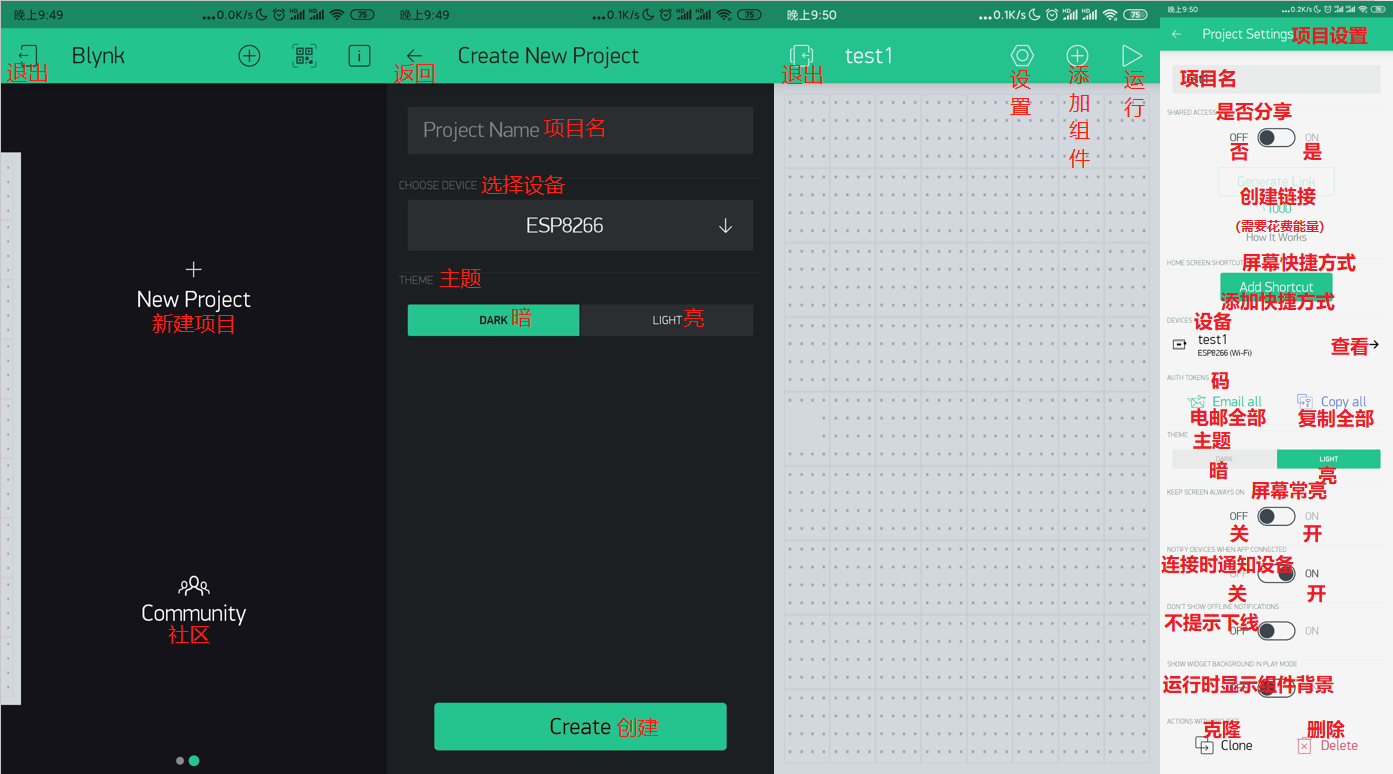


接下来，我们使用Jupyter编程，实现具体功能。

我们先来做一个入门实验——点亮小灯。

这是硬件实验入门必备的实验，首先我们在App上点击右上角的“+”，点击Bottom，添加一个按钮。设置中将PIN设置为V1。MODE可以选择PUSH(按住有效)或者SWITCH（按后有效，推荐）。

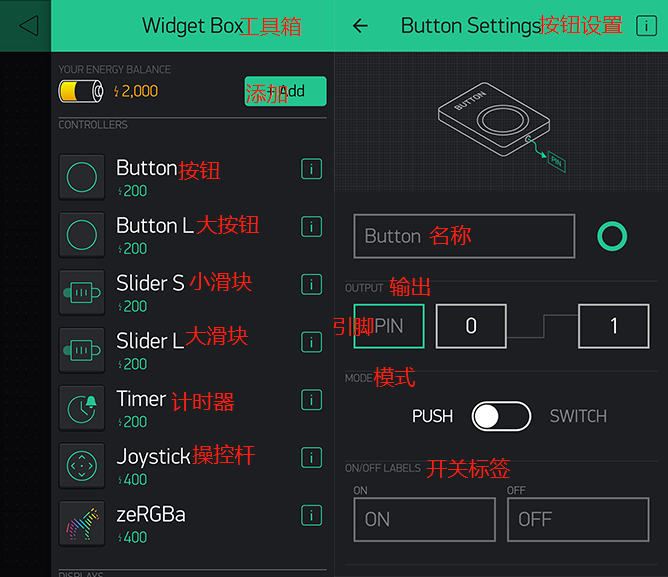

#### 接下来的操作在Jupyter上执行。

初次使用，我们需要安装Blynk库文件。使用pip3 install blynk-library-python。

In [ ]:
!pip3 install blynk-library-python

接下来，运行以下python代码。

其中的'YourAuthToken'需要替换为你的设备码（引号不可缺），可以从App点击设置图标，点击Copy all复制。

In [ ]:
import BlynkLib
from xugu import Pin 

YourAuthToken='App点击设置，点击Copy all复制设备码到此处'
YourHost='填写Blynk服务器IP到此处，也就是虚谷号的局域网IP'
blynk = BlynkLib.Blynk(YourAuthToken,server=YourHost,port=8080)

@blynk.VIRTUAL_WRITE(1)
def my_write_handler(value):
    print('Current V1 value: {}'.format(value))
    if value[0]=='1':
        print('on')
        led.write_digital(1)
    else :
        print('off')
        led.write_digital(0)

led = Pin(13, Pin.OUT)
    
while True:
    blynk.run()

试一试，点击手机右上方运行图标后，是不是可以成功用按钮控制LED灯了呢？

我们通过一张图片来了解一下控制的过程。
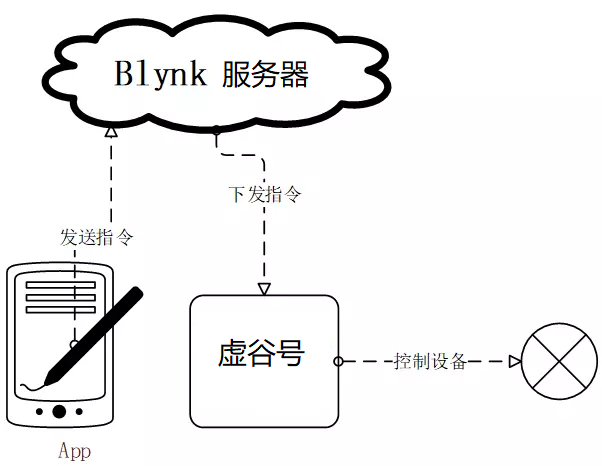

#### 下面我们来完成在岗检测仪。
手机端不需要改变，虚谷号需要连接硬件，一个红外数字避障传感器，如图所示。

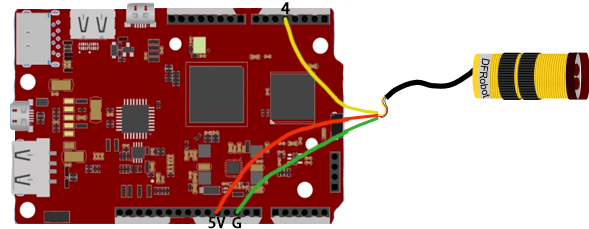

这里给出红外数字避障传感器接线说明，自上而下是信号线，5v线，GND线。请根据颜色判断。
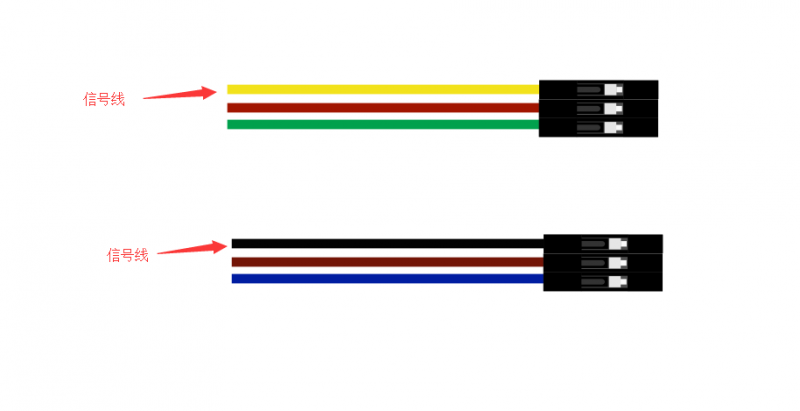

运行以下代码：

In [ ]:
import BlynkLib
import time

YourAuthToken='App点击设置，点击Copy all复制设备码到此处'
YourHost='填写Blynk服务器IP到此处，也就是虚谷号的局域网IP'
blynk = BlynkLib.Blynk(YourAuthToken,server=YourHost,port=8080)

@blynk.VIRTUAL_WRITE(1)
def my_write_handler(value):
    print('Current V1 value: {}'.format(value))

def BottomLabelInit(PIN):
    blynk.set_property(PIN,'onLabel','在岗')
    blynk.set_property(PIN,'offLabel','离开')

seat = Pin(4, Pin.IN)
BottomLabelInit(1)
flag = 0

while 1:
    blynk.run()
    if flag != seat.read_digital():
        flag = seat.read_digital()
        blynk.virtual_write(1,1-flag)
        if flag == 1:
            print('离开')
        else:
            print('在岗')
    time.sleep(1)

如果你想要添加其他老师在岗信息，要怎么做呢？动手试一试吧！

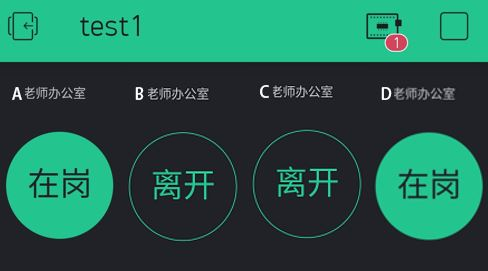

提示：手机端修改为如图所示，那么程序应该怎么改呢？尝试写在下面的程序框中吧！

#### 对比SIoT和Blynk：

SIoT网页版可以在多种终端查看，且具有API供其他程序调用，但是功能较为单一，市面上应用较少。

Blynk只能通过手机端控制，但是功能丰富，界面实用性强，现有应用较丰富。

## 扩展提升
你已经完成了本课的学习，想一想，你有没有类似的问题，能不能试着用所学的知识解决它呢？动手试一试吧！

## 参考资料：
参考网址：

在虚谷号上安装Blynk服务器https://mc.dfrobot.com.cn/thread-302809-1-1.html

后台运行Blynk的方法https://mc.dfrobot.com.cn/thread-303548-1-1.html

官方库文件文档https://github.com/vshymanskyy/blynk-library-python

Arduino与Blynk案例https://www.jianshu.com/p/df1f33ad5274

基于树莓派系统与Blynk远程控制水泵https://blog.csdn.net/gouxf_0219/article/details/80061053

当掌控遇上Blynk（2）——远程控制七彩灯https://mc.dfrobot.com.cn/thread-273949-1-1.html

搭建blynk本地服务器https://www.zhihu.com/question/290599206/answer/530065590

set_property帮助https://community.blynk.cc/t/setproperty-blynklib-py/32854